In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
exam = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [7]:
target = iris['species']
target[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [8]:
train_exam, test_exam, train_target, test_target = train_test_split(exam,  # 문제
                                                                    target, # 정답
                                                                    test_size=0.2, # 검증비율 20%, 훈련비율 80%
                                                                    random_state=100 # 시드값
                                                                    )

In [9]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 81 to 8
Data columns (total 4 columns):
sepal_length    120 non-null float64
sepal_width     120 non-null float64
petal_length    120 non-null float64
petal_width     120 non-null float64
dtypes: float64(4)
memory usage: 4.7 KB


In [10]:
train_target.count()

120

In [11]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 128 to 120
Data columns (total 4 columns):
sepal_length    30 non-null float64
sepal_width     30 non-null float64
petal_length    30 non-null float64
petal_width     30 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB


In [12]:
test_target.count()

30

In [13]:
train_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4


In [14]:
train_exam.reset_index(inplace=True)

In [15]:
train_exam.head()

,index,sepal_length,sepal_width,petal_length,petal_width
0,81,5.5,2.4,3.7,1.0
1,99,5.7,2.8,4.1,1.3
2,119,6.0,2.2,5.0,1.5
3,12,4.8,3.0,1.4,0.1
4,16,5.4,3.9,1.3,0.4


In [16]:
del train_exam['index']

In [17]:
train_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.4,3.7,1.0
1,5.7,2.8,4.1,1.3
2,6.0,2.2,5.0,1.5
3,4.8,3.0,1.4,0.1
4,5.4,3.9,1.3,0.4


In [18]:
test_exam.reset_index(inplace=True)
test_exam.head()

,index,sepal_length,sepal_width,petal_length,petal_width
0,128,6.4,2.8,5.6,2.1
1,11,4.8,3.4,1.6,0.2
2,118,7.7,2.6,6.9,2.3
3,15,5.7,4.4,1.5,0.4
4,123,6.3,2.7,4.9,1.8


In [19]:
del test_exam['index']
test_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.1
1,4.8,3.4,1.6,0.2
2,7.7,2.6,6.9,2.3
3,5.7,4.4,1.5,0.4
4,6.3,2.7,4.9,1.8


In [20]:
train_target = train_target.reset_index()
del train_target['index']
test_target = test_target.reset_index()
del test_target['index']

In [21]:
train_target[:5]

,species
0,versicolor
1,versicolor
2,virginica
3,setosa
4,setosa


In [22]:
test_target[:5]

,species
0,virginica
1,setosa
2,virginica
3,setosa
4,virginica


In [23]:
tree_clf = DecisionTreeClassifier(
                max_depth=3, random_state=42
)

In [24]:
train_exam

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.4,3.7,1.0
1,5.7,2.8,4.1,1.3
2,6.0,2.2,5.0,1.5
3,4.8,3.0,1.4,0.1
4,5.4,3.9,1.3,0.4
5,6.4,3.2,4.5,1.5
6,5.1,3.8,1.6,0.2
7,5.5,2.5,4.0,1.3
8,6.3,3.4,5.6,2.4
9,5.8,2.8,5.1,2.4


In [25]:
train_target

,species
0,versicolor
1,versicolor
2,virginica
3,setosa
4,setosa
5,versicolor
6,setosa
7,versicolor
8,virginica
9,virginica


In [26]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [27]:
tree_clf.score(train_exam, train_target)

0.9833333333333333

In [28]:
com_target = tree_clf.predict(test_exam)
com_target[:5]

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [29]:
accuracy_score(test_target, com_target)

0.9666666666666667

In [30]:
result = tree_clf.predict_proba([[2.1, 0.8, 2.4, 0.4]]) 
result[0]

array([1., 0., 0.])

In [31]:
#'setosa', 'versicolor', 'virginica'
max_proba = max(result[0])
max_index = list(result[0]).index(max_proba)
print(max_index)

0


In [32]:
def func4(x):
    if x == 0:
        print('setosa!!')
    elif x == 1:
        print('versicolor!!')
    else:
        print('virginica')

In [33]:
func4(max_index)

setosa!!


In [34]:
train_exam.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [35]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.59655894, 0.40344106])

In [36]:
x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = tree_clf.feature_importances_

In [37]:
result_df = pd.DataFrame({'feature':x, 'weight':y}, index=x)
result_df

,feature,weight
sepal_length,sepal_length,0.000000
sepal_width,sepal_width,0.000000
petal_length,petal_length,0.596559
petal_width,petal_width,0.403441


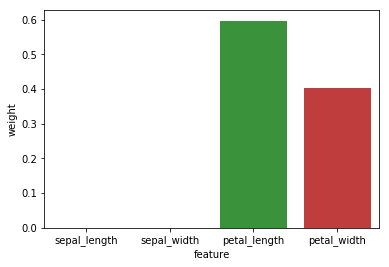

In [38]:
sns.barplot('feature', 'weight', data=result_df)